<a href="https://colab.research.google.com/github/PabloMorillaCabello/Introduction-to-Artificial-Inteligence/blob/main/Unsupervised_Learning_Using_K_Means_Clustering_on_California_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB REPORT Unsupervised Learning Using K-Means Clustering on California Housing Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans, DBSCAN #We will compare the results with dbscan later.
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from google.colab import files #While getting the dataset, we get error 403 so we just uploaded housing.csv
files.upload()
X= pd.read_csv("housing.csv")
X.head()

X= X[['longitude', 'latitude', 'median_income']].copy()


Saving housing.csv to housing (2).csv


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]


Figure saved to: /content/inertia_vs_k_plot.png


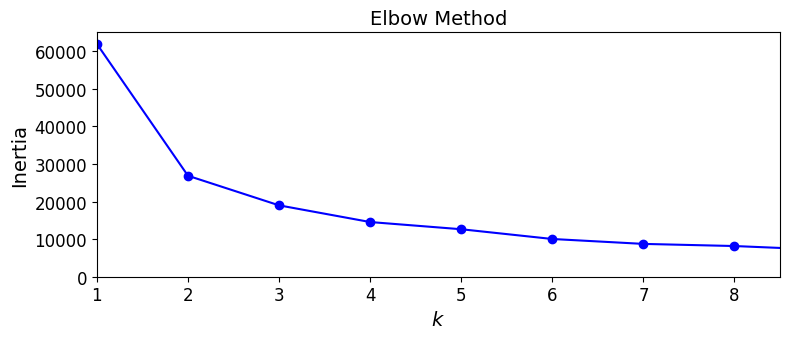

In [ ]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("/content", fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved to: {path}")

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("Elbow Method", fontsize=14)
plt.axis([1, 8.5, 0, max(inertias)*1.05])
save_fig("inertia_vs_k_plot")
plt.show()

Figure saved to: /content/silhouette_score_vs_k_plot.png


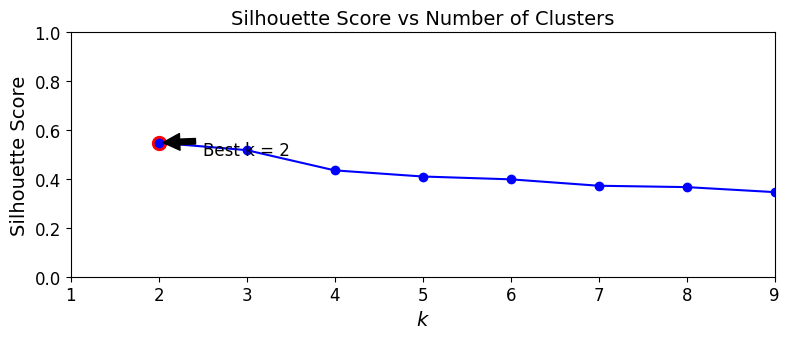

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_scaled)
                for k in range(2, 10)]
silhouette_scores = [silhouette_score(X_scaled, model.labels_)
                     for model in kmeans_per_k]
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.title("Silhouette Score vs Number of Clusters", fontsize=14)
plt.axis([1, 9, 0, 1])


best_k = range(2, 10)[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)
plt.scatter(best_k, best_score, color="red", s=100)
plt.annotate(f"Best k = {best_k}",
             xy=(best_k, best_score),
             xytext=(best_k+0.5, best_score-0.05),
             arrowprops=dict(facecolor="black", shrink=0.1),
             fontsize=12)

save_fig("silhouette_score_vs_k_plot")
plt.show()

Figure saved to: /content/silhouette_analysis_plot.png


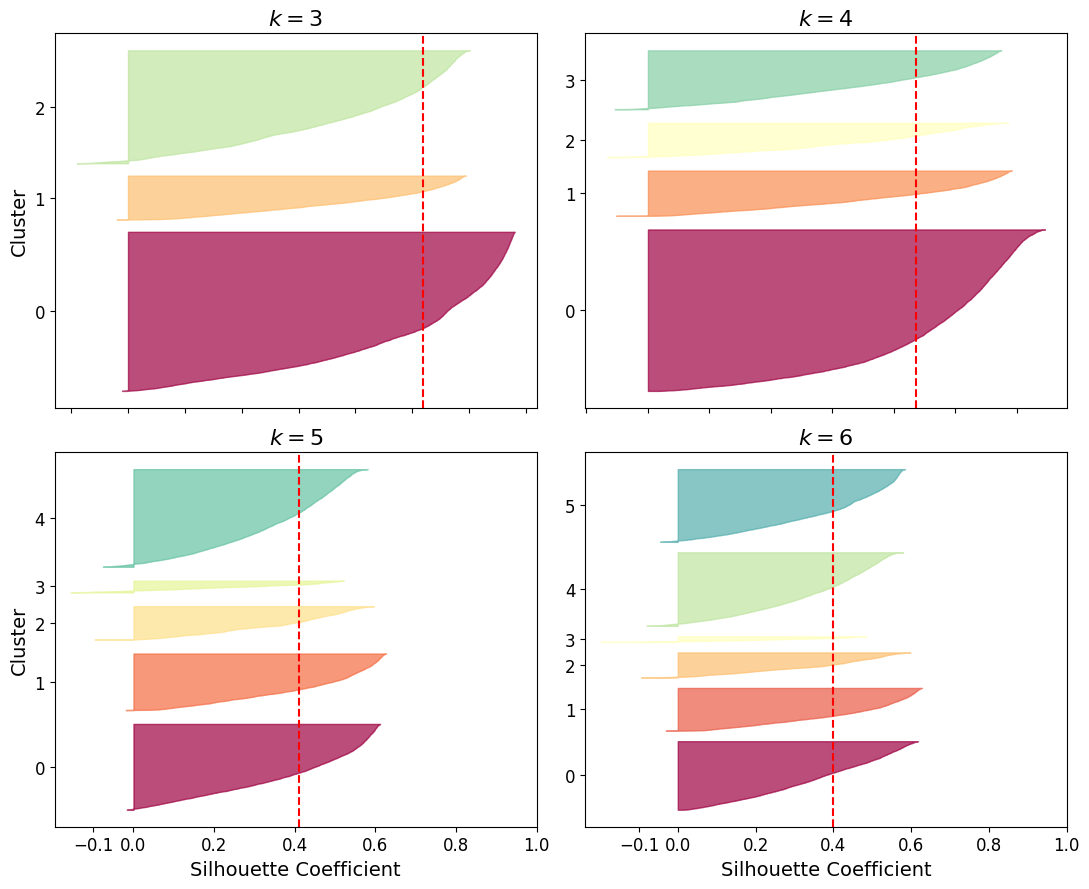

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_scaled, y_pred)

    padding = len(X_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()


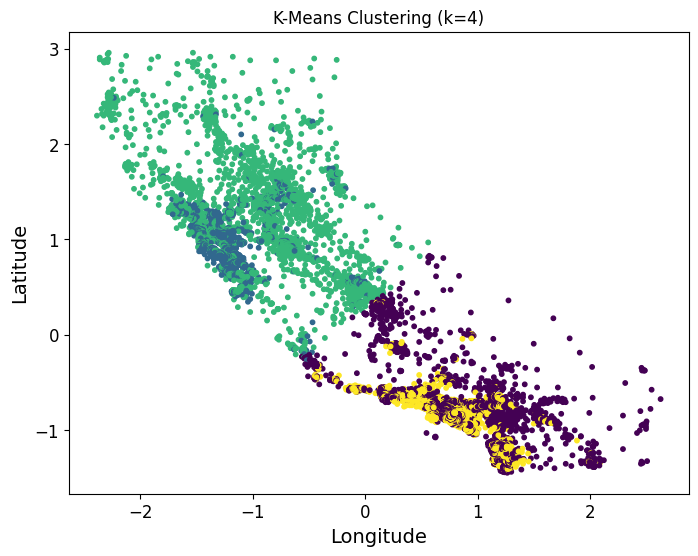

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=kmeans_labels, cmap="viridis", s=10)
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Yellow= South California, high population with average income.

Purple= Central Valley, countryside with low income.

Green= North Beach near San Francisco, high income.

Blue= Northern part, seperated population, low income.


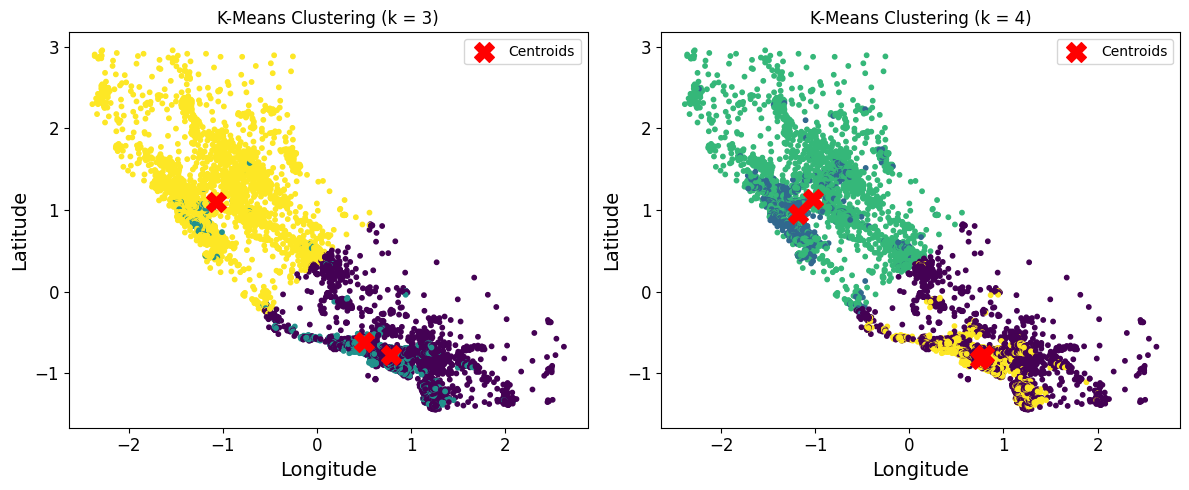

In [ ]:
k3 = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
k4 = KMeans(n_clusters=4, random_state=42).fit(X_scaled)


labels3 = k3.labels_
labels4 = k4.labels_


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels3, cmap="viridis", s=10)
plt.title("K-Means Clustering (k = 3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


centers3 = scaler.inverse_transform(k3.cluster_centers_)
plt.scatter(centers3[:, 0], centers3[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels4, cmap="viridis", s=10)
plt.title("K-Means Clustering (k = 4)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

centers4 = scaler.inverse_transform(k4.cluster_centers_)
plt.scatter(centers4[:, 0], centers4[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.legend()

plt.tight_layout()
plt.show()

# **!!NOT GONNA PUT IN THE REPORT JUST TO VISUALIZE!!!**

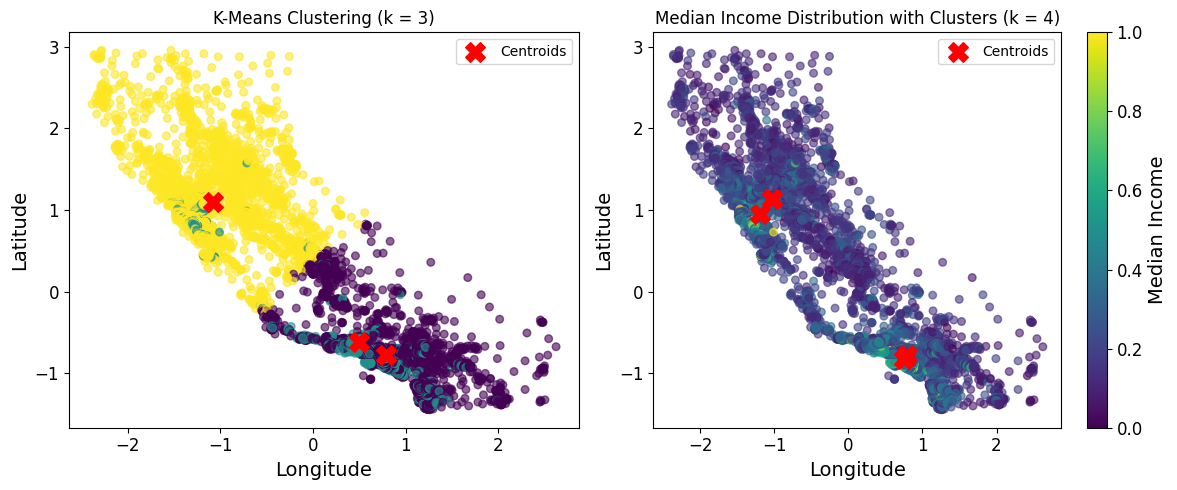

In [ ]:
k3 = KMeans(n_clusters=3, random_state=42).fit(X_scaled)
k4 = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

labels3 = k3.labels_
labels4 = k4.labels_


X_df = pd.DataFrame(X, columns=["longitude", "latitude", "median_income"])


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.scatter(X_df["longitude"], X_df["latitude"],
            c=labels3, cmap="viridis", s=30, alpha=0.6)
plt.scatter(scaler.inverse_transform(k3.cluster_centers_)[:, 0],
            scaler.inverse_transform(k3.cluster_centers_)[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.title("K-Means Clustering (k = 3)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_df["longitude"], X_df["latitude"],
            c=X_df["median_income"], cmap="viridis", s=30, alpha=0.6)
plt.scatter(scaler.inverse_transform(k4.cluster_centers_)[:, 0],
            scaler.inverse_transform(k4.cluster_centers_)[:, 1],
            c="red", marker="X", s=200, label="Centroids")
plt.title("Median Income Distribution with Clusters (k = 4)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Median Income")
plt.legend()

plt.tight_layout()
plt.show()


# -Now, for DBSCAN-

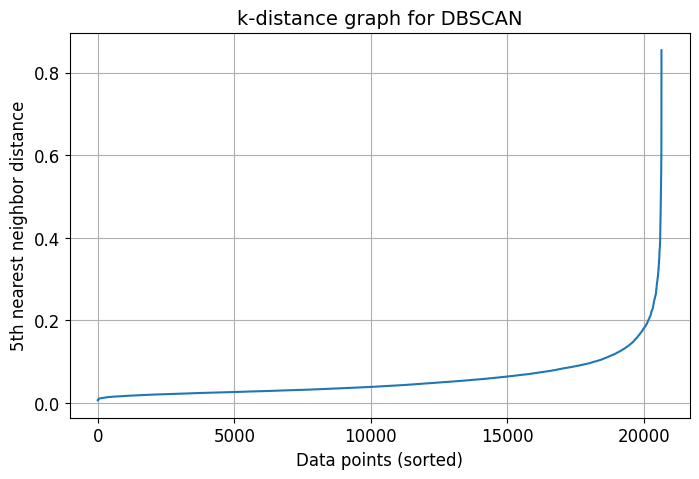

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])

plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("k-distance graph for DBSCAN", fontsize=14)
plt.xlabel("Data points (sorted)", fontsize=12)
plt.ylabel("5th nearest neighbor distance", fontsize=12)
plt.grid(True)
plt.show()

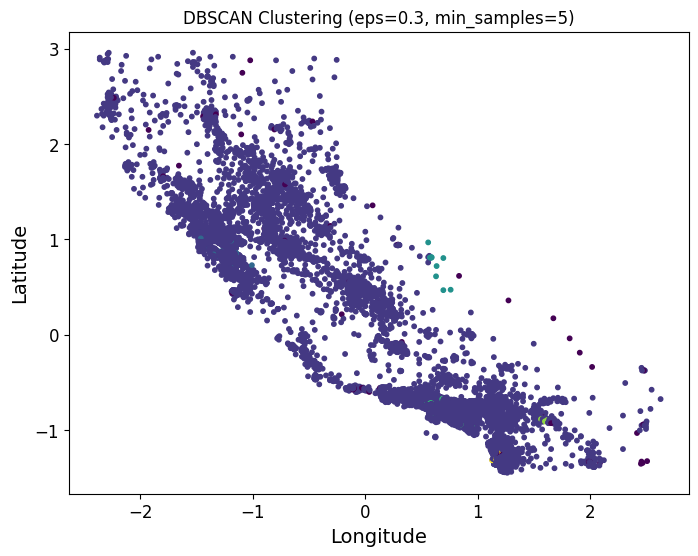

In [ ]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = list(db_labels).count(-1)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=db_labels, cmap="viridis", s=10)
plt.title(f"DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

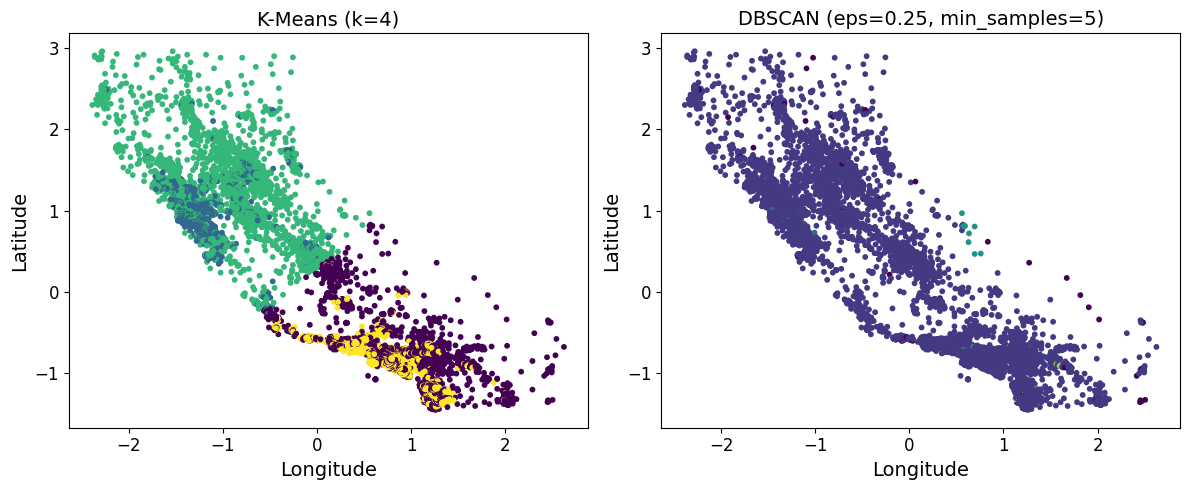

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=kmeans_labels, cmap="viridis", s=10)
plt.title("K-Means (k=4)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=dbscan_labels, cmap="viridis", s=10)
plt.title("DBSCAN (eps=0.25, min_samples=5)", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()


K-Means: Divides all points into 4 clusters, assigns every point to cluster.

DBSCAN: Makes groups only in dense areas and marks the spare ones as noise. Better shows real density difference.

Results: K-Means gives general regional seperation, DBSCAN finds dense city areas which we dont need beacuse we are not looking for dense city areas.